<a href="https://colab.research.google.com/github/bonareri/Marketing-Campaign-Analysis/blob/main/Marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.express as px

### Data Loading & Exploration

In [30]:
#load data
df = pd.read_csv('/content/final_shop_6modata.csv')

In [31]:
df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


### Data cleaning

### Check for Missing Values and Duplicates

In [34]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Duplicate Rows:", duplicate_count)

Missing Values:
 Ad Group       0
Month          0
Impressions    0
Clicks         0
CTR            0
Conversions    0
Conv Rate      0
Cost           0
CPC            0
Revenue        0
Sale Amount    0
P&L            0
dtype: int64
Duplicate Rows: 0


### Exploratory Data Analysis (EDA)

In [35]:
df.describe()

,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,14077.363158,4865.805263,0.272105,505.242105,0.079737,3344.063158,0.791263,2957.684211,63416.180579,-386.361916
std,29771.686227,11348.529219,0.107894,1052.202922,0.052859,6524.606753,0.403312,5962.413097,125414.656922,903.073776
min,35.000000,2.000000,0.050000,0.000000,0.000000,1.000000,0.140000,0.000000,0.000000,-5672.271000
25%,1065.000000,264.500000,0.192500,24.000000,0.050000,188.500000,0.480000,144.500000,2985.135000,-294.977500
50%,4969.000000,930.000000,0.285000,70.500000,0.070000,563.500000,0.635000,459.500000,10274.105000,-75.978000
75%,13380.000000,4190.500000,0.360000,428.250000,0.100000,2967.000000,1.107500,2672.250000,59345.195000,-6.027500
max,276568.000000,99526.000000,0.470000,7563.000000,0.500000,43542.000000,2.020000,42440.000000,886095.310000,1507.685000


### Overview of data
The dataset contains 190 records of a **5-month paid search campaign** to promote a shopping mall using **40 different ad groups**. Key performance indicators include **impressions, clicks, CTR, conversions, cost, revenue, and profit/loss (P&L).**  

### Key Insights
- On average, ads received **14,077 impressions** and **4,865 clicks** per campaign.  
- The **average CTR (Click-Through Rate)** is **27.2%**, indicating a good level of engagement.  
- The **average conversion rate** is **7.97%**, but there is high variability across campaigns.  
- The highest **conversion rate** observed is **50%**, while some campaigns had **zero conversions**.  

### Financial Analysis
- The **average cost per campaign** is **\$3,344**, with some campaigns costing as high as **\$43,542**.  
- The **average CPC (Cost Per Click)** is **\$0.79**, ranging from **\$0.14** to **\$2.02**.  
- Revenue per campaign averages **\$2,957**, but some campaigns generated up to **\$42,440**.  
- **P&L** is negative on average **(-\$386),** meaning most campaigns resulted in a loss.  
- Some campaigns made a **profit** of up to **\$1,507**, while others incurred losses as high as **-\$5,672**.  

In [36]:
df.groupby("Ad Group")[["Clicks", "Impressions", "Conversions"]].sum().sort_values(by="Clicks", ascending=False)

,Clicks,Impressions,Conversions
Ad Group,,,
Shop - 1:1 - Mob - [shop coupon],267398,719140,14022
Shop - 1:1 - Mob - [shop promo code],132203,304202,16174
Shop - 1:1 - Mob - [shop coupon code],102347,234766,9546
Shop - 1:1 - Desk - [shop coupon],66619,183886,10232
Shop - 1:1 - Desk - [shop promo code],54312,142526,12439
Shop - Exact - Mob - Coupon Code,45441,131273,2905
Shop - Exact - Mob - Promo Code,40152,107057,4084
Shop - 1:1 - Desk - [shop coupon code],33805,87936,6094
Shop - Phrase - Mob - Promo Code,20554,81574,1578


### 📊 Ad Group Performance Insights

#### **Top-Performing Ad Groups**  
- **Best for conversions:**  
  - **Shop - 1:1 - Mob - [shop promo code]** → **16,174 conversions**  
  - **Shop - 1:1 - Mob - [shop coupon]** → **14,022 conversions**  
  - **Shop - 1:1 - Desk - [shop promo code]** → **12,439 conversions**  
- **Highest impressions:**  
  - **Shop - 1:1 - Mob - [shop coupon]** → **719,140 impressions**  
  - Despite high impressions, it converted less than the **promo code** campaign.  

#### **Keyword Performance**  
- **Promo Code > Coupon Code > Discount Code** (higher conversions).  
- **Competitor & Free Shipping keywords performed poorly.**  
- **Seasonal ads (Black Friday/Cyber Monday) underperformed.**  

#### **Low-Performing Ad Groups**  
- **Weak engagement:**  
  - **Shop - Phrase - Desk - Competitor** → 10 clicks, 2 conversions.  
  - **Shop - Exact - Desk - Black Friday/Cyber Monday** → 24 clicks, 7 conversions.  
  - **Shop - Phrase - Mob - Free Shipping** → 109 clicks, 5 conversions.  

#### **Recommendations**  
✅ **Increase budget for high-converting "Promo Code" ads.**  
✅ **Reduce spend on competitor & free shipping campaigns.**  
✅ **Optimize seasonal ads with better targeting.**  
✅ **Test new messaging for underperforming ads.**  

📢 **Conclusion:** Promo code-based ads perform best. Seasonal and competitor-targeted campaigns need optimization.  


In [37]:
df.groupby("Ad Group")["CTR"].mean().sort_values(ascending=False)

,CTR
Ad Group,
Shop - 1:1 - Mob - [shop coupon code],0.440000
Shop - 1:1 - Mob - [shop promo code],0.440000
Shop - 1:1 - Mob - [shop discount code],0.406000
Shop - 1:1 - Desk - [shop coupon code],0.388000
Shop - 1:1 - Desk - [shop promo code],0.388000
Shop - 1:1 - Desk - [shop discount code],0.386000
Shop - Exact - Mob - Promo Code,0.378000
Shop - 1:1 - Mob - [shop coupon],0.378000
Shop - 1:1 - Desk - [shop coupon],0.366000


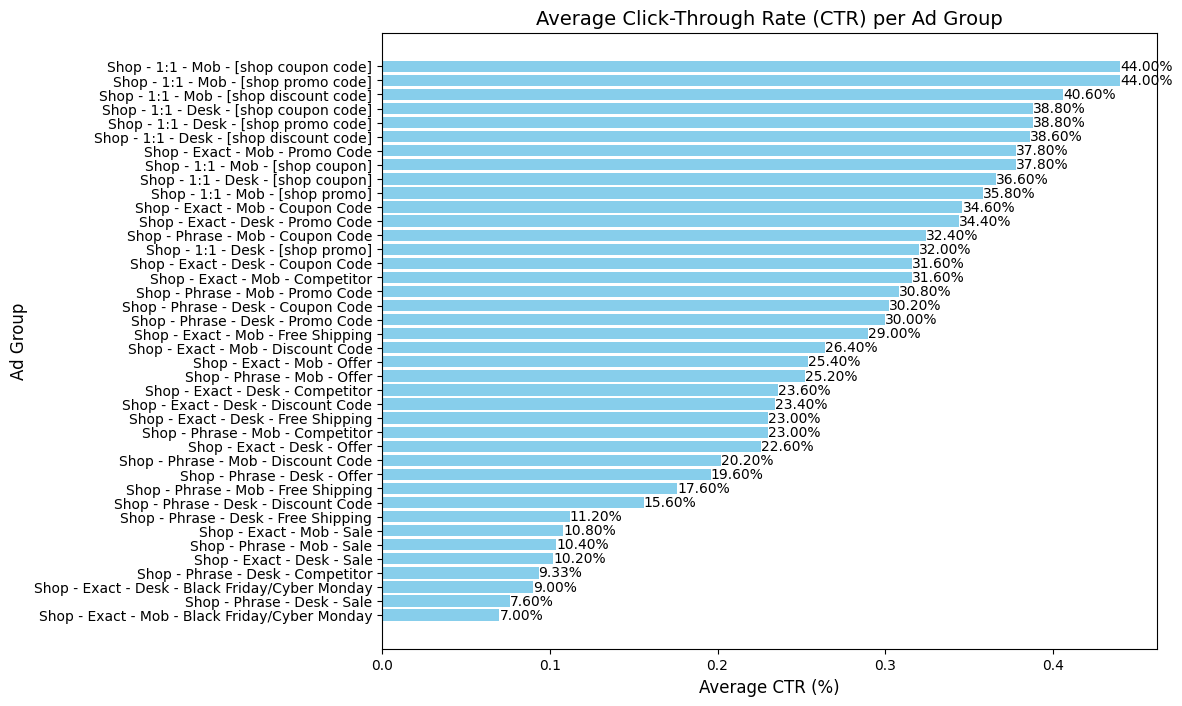

In [46]:
# Group by Ad Group and compute mean CTR
ctr_by_ad_group = df.groupby("Ad Group")["CTR"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(ctr_by_ad_group.index, ctr_by_ad_group, color="skyblue")
plt.xlabel("Average CTR (%)", fontsize=12)
plt.ylabel("Ad Group", fontsize=12)
plt.title("Average Click-Through Rate (CTR) per Ad Group", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show highest CTR on top

# Display values on bars
for index, value in enumerate(ctr_by_ad_group):
    plt.text(value, index, f"{value:.2%}", va="center", fontsize=10)

plt.show()

In [38]:
df.groupby("Month")["Conversions"].sum().sort_values(ascending=False)

,Conversions
Month,
November,43267
July,17762
October,13312
August,12230
September,9425


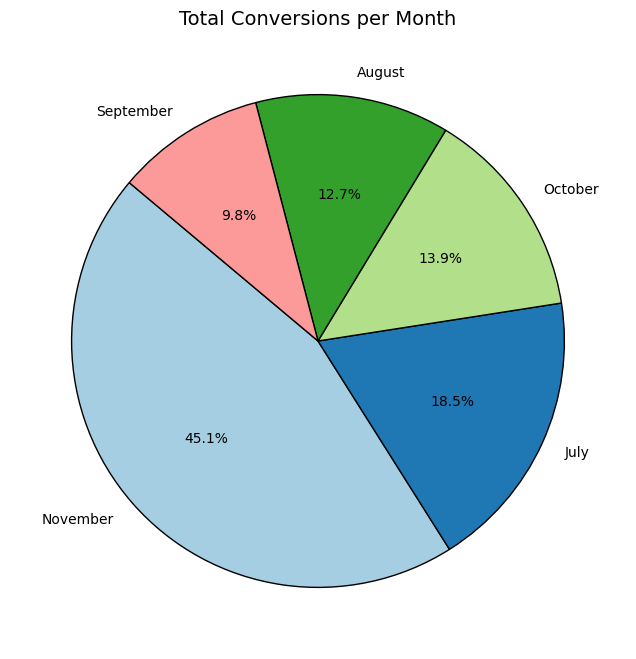

In [45]:
# Group by Month and sum conversions
monthly_conversions = df.groupby("Month")["Conversions"].sum().sort_values(ascending=False)

# Define colors
colors = plt.cm.Paired.colors

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(monthly_conversions, labels=monthly_conversions.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Title
plt.title("Total Conversions per Month", fontsize=14)

# Show plot
plt.show()

In [39]:
df.groupby("Month")[["Cost", "Revenue"]].sum()

,Cost,Revenue
Month,,
August,84225,72116
July,120541,98615
November,280753,252833
October,78256,79303
September,71597,59093


In [40]:
df["Profit_Loss"] = df["Revenue"] - df["Cost"]

In [41]:
df["Conversion Rate"] = (df["Conversions"] / df["Clicks"]) * 100
df.groupby("Ad Group")["Conversion Rate"].mean().sort_values(ascending=False)

,Conversion Rate
Ad Group,
Shop - Exact - Desk - Black Friday/Cyber Monday,29.166667
Shop - 1:1 - Desk - [shop promo code],22.175422
Shop - Exact - Desk - Promo Code,20.863063
Shop - 1:1 - Desk - [shop promo],20.643917
Shop - Exact - Desk - Offer,18.728001
Shop - Phrase - Desk - Promo Code,18.690429
Shop - 1:1 - Desk - [shop discount code],17.963019
Shop - 1:1 - Desk - [shop coupon code],17.599593
Shop - Phrase - Desk - Coupon Code,16.333862


<ipython-input-44-13c9f3454668>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.values, y=conversion_rate.index, palette="viridis")


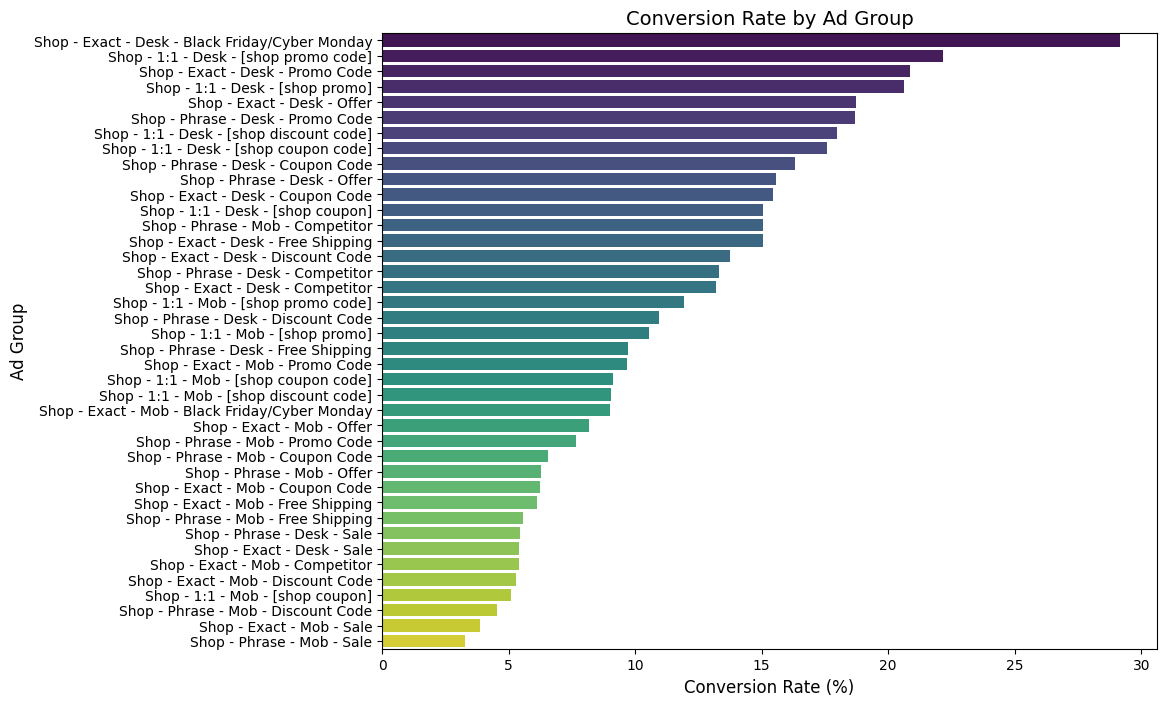

In [44]:
# Calculate Conversion Rate
df["Conversion Rate"] = (df["Conversions"] / df["Clicks"]) * 100

# Group by Ad Group and sort
conversion_rate = df.groupby("Ad Group")["Conversion Rate"].mean().sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(10, 8))

# Create barplot
sns.barplot(x=conversion_rate.values, y=conversion_rate.index, palette="viridis")

# Titles and labels
plt.title("Conversion Rate by Ad Group", fontsize=14)
plt.xlabel("Conversion Rate (%)", fontsize=12)
plt.ylabel("Ad Group", fontsize=12)

# Show plot
plt.show()

### 🔍 Conversion Rate Insights  

#### **Top-Performing Ad Groups**  
- **Best conversion rates:**  
  - **Shop - Exact - Desk - Black Friday/Cyber Monday** → **29.17%**  
  - **Shop - 1:1 - Desk - [shop promo code]** → **22.18%**  
  - **Shop - Exact - Desk - Promo Code** → **20.86%**  
  - **Shop - 1:1 - Desk - [shop promo]** → **20.64%**  
  - **Shop - Exact - Desk - Offer** → **18.73%**  

#### **Key Takeaways**  
✅ **Desktop campaigns outperform mobile campaigns in conversion rate.**  
✅ **Promo Code, Offer, and Discount Code keywords drive higher conversions.**  
✅ **Black Friday/Cyber Monday campaigns have the highest conversion rate but may need more traffic.**  
✅ **Competitor and Free Shipping campaigns have low conversion rates.**  

#### **Low-Performing Ad Groups**  
- **Struggling to convert:**  
  - **Shop - Exact - Mob - Sale** → **3.86%**  
  - **Shop - Phrase - Mob - Sale** → **3.29%**  
  - **Shop - Phrase - Mob - Discount Code** → **4.53%**  
  - **Shop - 1:1 - Mob - [shop coupon]** → **5.11%**  

#### **Recommendations**  
🔹 **Invest more in high-converting desktop campaigns.**  
🔹 **Optimize low-performing mobile campaigns with better targeting.**  
🔹 **Refine messaging for sales and discount-related keywords.**  
🔹 **Consider retargeting for low-conversion ad groups.**  

📢 **Conclusion:** Desktop campaigns, especially those using promo codes and offers, are the most effective. Mobile campaigns need optimization for better performance.  


###  Data Visualization for Insights

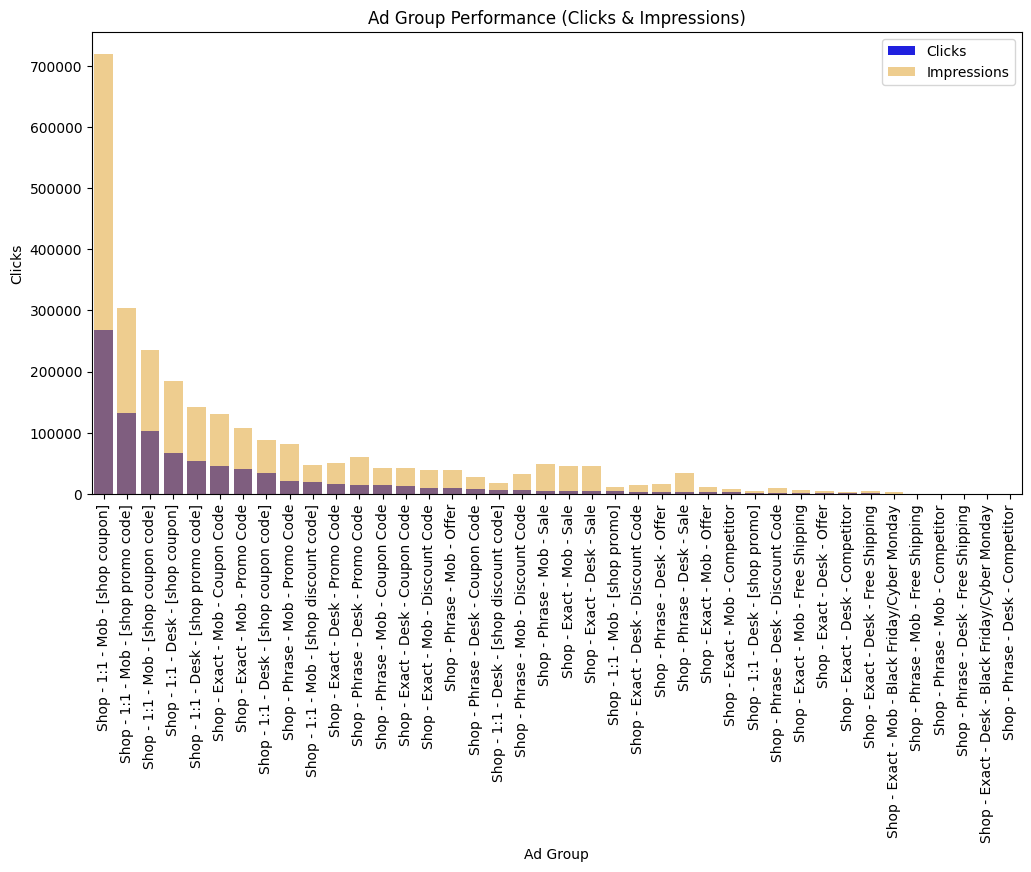

In [42]:
ad_group_performance = df.groupby("Ad Group")[["Clicks", "Impressions"]].sum().sort_values(by="Clicks", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=ad_group_performance.index, y=ad_group_performance["Clicks"], color="blue", label="Clicks")
sns.barplot(x=ad_group_performance.index, y=ad_group_performance["Impressions"], color="orange", alpha=0.5, label="Impressions")
plt.xticks(rotation=90)
plt.legend()
plt.title("Ad Group Performance (Clicks & Impressions)")
plt.show()

<Axes: title={'center': 'Advertising Cost vs Revenue'}, xlabel='Month'>

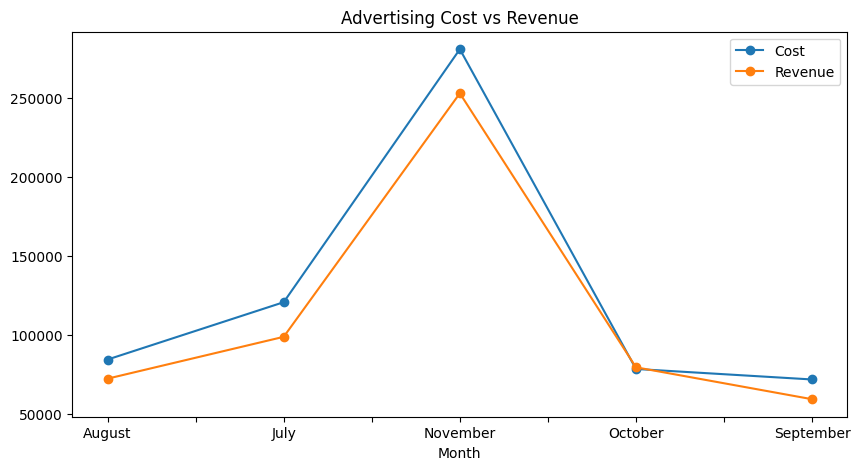

In [43]:
monthly_perf = df.groupby("Month")[["Cost", "Revenue"]].sum()
monthly_perf.plot(kind="line", marker="o", figsize=(10, 5), title="Advertising Cost vs Revenue")